In [ ]:
import pandas as pd
import re

# Dosyayı yükleme ve DataFrame olarak okuma
data_path = 'a.xlsx'
data = pd.read_excel(data_path)

# Türkçe stop words listesi
turkish_stop_words = {
    "acaba", "ama", "aslında", "az", "bazen", "bazı", "bazıları", "bazısı", "belki",
    "ben", "beni", "benim", "beş", "bile", "bir", "birçoğu", "birçok", "birçokları",
    "biri", "birisi", "birkaç", "birkaçı", "birşey", "birşeyi", "biz", "bize", "bizi",
    "bizim", "böyle", "böylece", "bu", "buna", "bunda", "bundan", "bunu", "bunun",
    "burada", "bütün", "çoğu", "çoğuna", "çoğunu", "çok", "çünkü", "da", "daha",
    "de", "değil", "demek", "diğer", "diğeri", "diğerleri", "diye", "dokuz", "dolayı",
    "dört", "elbette", "en", "fakat", "falan", "felan", "filan", "gene", "gibi",
    "hâlâ", "hangi", "hangisi", "hani", "hatta", "hem", "henüz", "hep", "hepsi",
    "hepsine", "hepsini", "her", "her biri", "herkes", "herkese", "herkesi", "hiç",
    "hiç kimse", "hiçbiri", "hiçbirine", "hiçbirini", "için", "içinde", "iki", "ile",
    "ise", "işte", "kaç", "kadar", "kendi", "kendine", "kendini", "ki", "kim",
    "kime", "kimi", "kimin", "kimisi", "madem", "mı", "mi", "mu", "mü", "nasıl",
    "ne", "ne kadar", "ne zaman", "neden", "nedir", "nerde", "nerede", "nereden",
    "nereye", "nesi", "neyse", "niçin", "niye", "o", "ona", "ondan", "onlar",
    "onlara", "onlardan", "onların", "onu", "onun", "orada", "oysa", "oysaki",
    "öbürü", "ön", "önce", "ötürü", "öyle", "rağmen", "sana", "sekiz", "sen",
    "senden", "seni", "senin", "siz", "sizden", "size", "sizi", "sizin", "son",
    "sonra", "şayet", "şey", "şeyden", "şeye", "şeyi", "şeyler", "şimdi", "şöyle",
    "şu", "şuna", "şunda", "şundan", "şunlar", "şunu", "tabi", "tamam", "tüm",
    "tümü", "üç", "üzere", "var", "ve", "veya", "veyahut", "ya", "ya da", "yani",
    "yedi", "yerine", "yine", "yoksa", "zaten"
}


# Ön işlem fonksiyonu
def preprocess_text(text):
    text = str(text).lower()  # Küçük harfe çevir
    text = re.sub(r'\d+', ' ', text)  # Sayıları kaldır
    text = re.sub(r'[^\w\s]', ' ', text)  # Noktalama işaretlerini kaldır
    text = re.sub(r'\s+', ' ', text)  # Fazla boşlukları kaldır
    text = text.strip()  # Baştan ve sondan boşlukları kaldır
    tokens = text.split()  # Tokenleme
    tokens = [word for word in tokens if word not in turkish_stop_words]  # Stop words kaldırma
    return ' '.join(tokens)  # Tekrar birleştir

# 'Haber Gövdesi' sütununu ön işle
data['Haber Gövdesi'] = data['Haber Gövdesi'].apply(preprocess_text)


data.to_csv('processed_texts.csv', index=False)



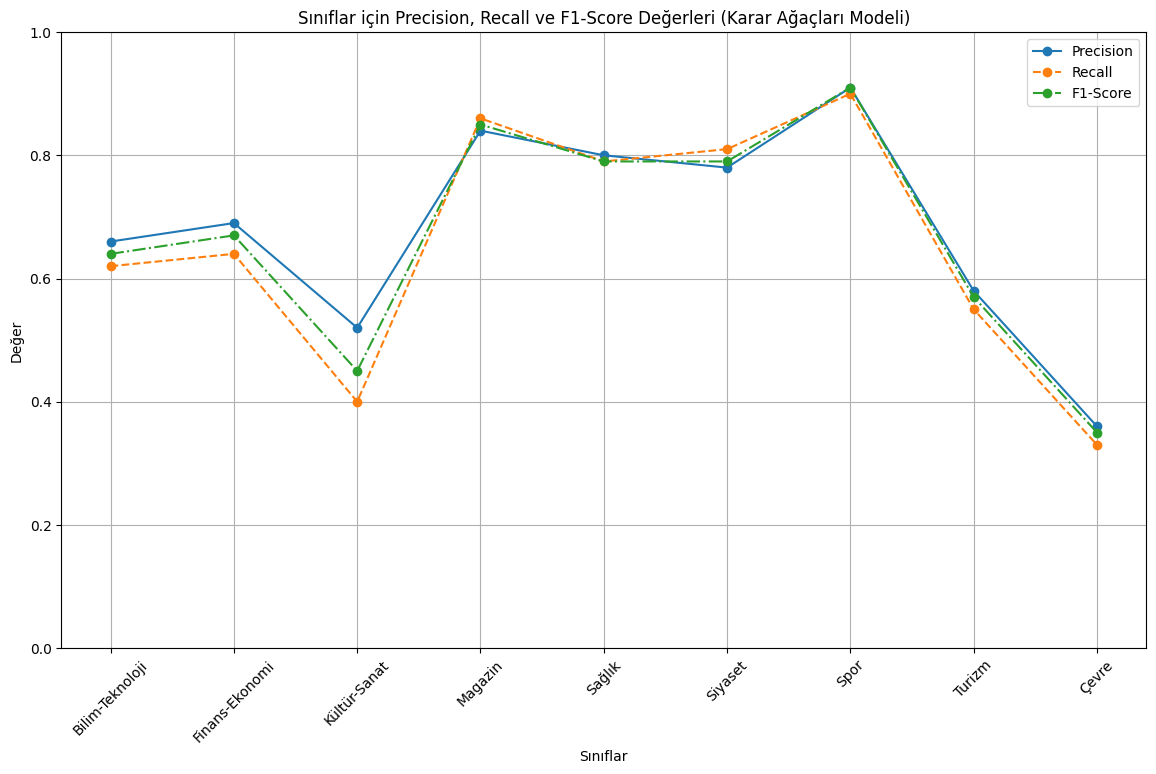

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# İşlenmiş veriyi yükle
data = pd.read_csv('processed_texts.csv')

# NaN değerlerini kaldır
data.dropna(subset=['Haber Gövdesi', 'Sınıf'], inplace=True)

# TF-IDF vektörleştiriciyi oluşturma ve uygulama
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['Haber Gövdesi'])

# Etiketleri ve öznitelikleri ayırma
X = tfidf_matrix
y = data['Sınıf']

# Veriyi eğitim ve test seti olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes modelini eğitme
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = nb_model.predict(X_test)

# Modelin başarımını değerlendirme
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred)

# Başarım metriklerini yazdırma
print("Naive Bayes Modeli Doğruluk (Accuracy):", accuracy)
print("Naive Bayes Modeli Kesinlik (Precision):", precision)
print("Naive Bayes Modeli Duyarlılık (Recall):", recall)
print("\nNaive Bayes Sınıflandırma Raporu:\n", report)

